In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import pylab as plt
import seaborn
import jieba
import re
from wordcloud import WordCloud

In [2]:
plt.rc('figure', figsize=(15, 8))
seaborn.set()

In [3]:
data = pd.read_csv('weibo.csv',encoding='gbk')

首先看看数据长什么样。
爬下来的微博数据包含下面几个列:
- weibo_content   微博内容
- weibo_place    微博签到地址
- publish_time   微博发送时间
- publish_tool   微博设备客户端
- up_num       点赞数
- retweet_num    转发数
- comment_num    评论数

In [4]:
data.head()

,id,weibo_content,weibo_place,publish_time,publish_tool,up_num,retweet_num,comment_num
0,0,转发理由:高玉倩老师千古！[祈祷][祈祷][祈祷][泪][泪][泪]\n原始用户: 贾怀胤\...,无,2018-12-23 11:46,iPhone 7 Plus,4008,209,316
1,1,百花齐放，独树一帜！[good][握手][耶]@书与画收藏,无,2018-12-24 08:31,iPhone 7 Plus,834,50,54
2,2,转发理由:[good][握手][耶]\n原始用户: 微博艺术\n转发内容: #遇见艺术##V...,无,2018-12-23 20:30,iPhone 7 Plus,1528,72,120
3,3,上午在大杭州冒着霏霏细雨拜谒“盖叫天故居”[祈祷]幸会我国京剧艺术大师盖叫天先生之孙、京剧表...,无,2018-12-22 13:01,iPhone 7 Plus,3146,98,233
4,4,今天下午央视版 @西游记摄像师王崇秋 老师的新书《1982版西游记拍摄档案》在济南的新华·爱...,无,2018-12-22 10:00,iPhone 7 Plus,2620,170,173


### 设备分析

In [5]:
devices = data.publish_tool.value_counts()
print(devices[:20])

iPhone 6 Plus    1038
微博 weibo.com      904
iPhone 7 Plus     716
360安全浏览器          714
iPhone客户端         430
iPhone 5s         345
iPhone            205
搜狗高速浏览器           115
分享按钮              100
百度分享               87
新浪博客               49
bShare分享           25
秒拍网页版              22
无                  21
腾讯视频               20
优酷土豆               20
中新网微博              19
JiaThis分享按钮        19
微博搜索               17
网易娱乐               17
Name: publish_tool, dtype: int64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000001BCAF9B0>],
      dtype=object)

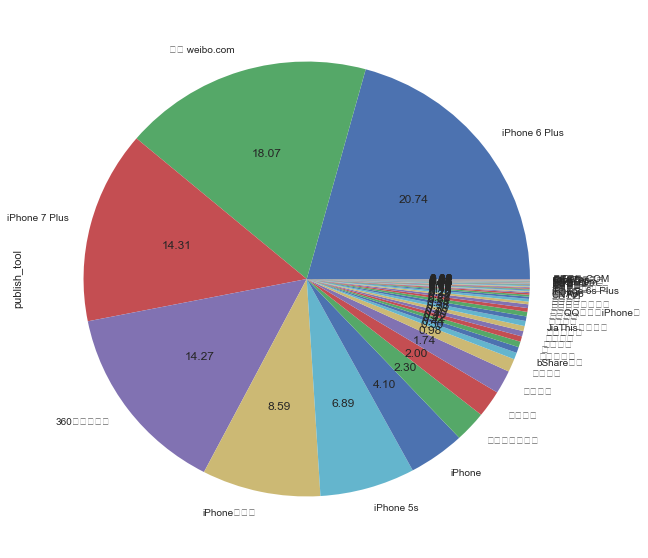

In [6]:
devices.abs().plot.pie(subplots=True, figsize=(10, 10), autopct="%.2f")

### 点赞数

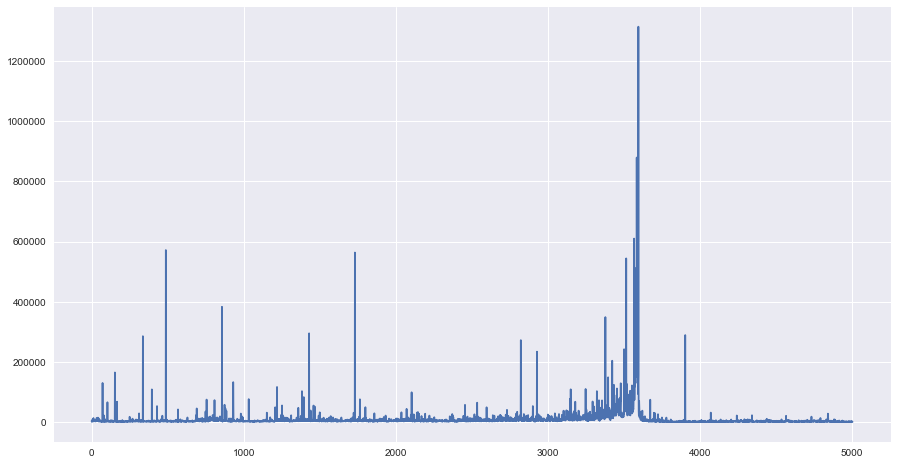

In [7]:
plt.plot([i for i in range(len(data.up_num))],data.up_num)
plt.show()

In [8]:
data[data.up_num > 600000]

,id,weibo_content,weibo_place,publish_time,publish_tool,up_num,retweet_num,comment_num
3567,3567,我最亲爱的父亲，您离开我们已经整整两年了，思念甚浓，衷心祝愿您天天有绍剧猴戏陪伴朝夕，我们永...,无,2016-01-31 12:42,iPhone 5s,610105,14534,26029
3584,3584,“齐天大圣”与大家一起共贺猴年吉祥、国泰民安！照片摄于昨天下午录制央视戏曲春节联欢晚会化妆间。,无,2016-01-27 14:23,微博 weibo.com,879613,49472,58125
3591,3591,今天下午参加了中央电视台春节戏曲晚会《金猴迎春》节目的排练与录制，我发布排练及化好妆的微博后...,无,2016-01-26 20:21,微博 weibo.com,759417,28872,36439
3595,3595,已化好妆准备录制。,无,2016-01-26 13:44,iPhone 5s,1314806,202708,127685


### 转发数

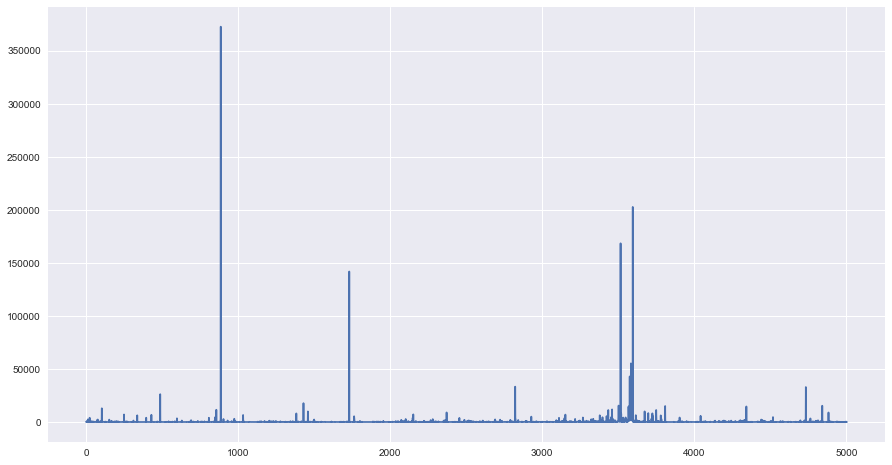

In [9]:
plt.plot([i for i in range(len(data.retweet_num))],data.retweet_num)
plt.show()

In [10]:
data[data.retweet_num > 150000]

,id,weibo_content,weibo_place,publish_time,publish_tool,up_num,retweet_num,comment_num
886,886,转发理由:[good][耶][握手]\n原始用户: TFBOYS-王源\n转发内容: 俺老孙...,无,2018-01-23 11:52,iPhone客户端,37365,372610,4826
3515,3515,送给大家的祝福。 秒拍视频 .,无,2016-02-07 08:21,秒拍网页版,544198,168426,33680
3595,3595,已化好妆准备录制。,无,2016-01-26 13:44,iPhone 5s,1314806,202708,127685


### 评论数

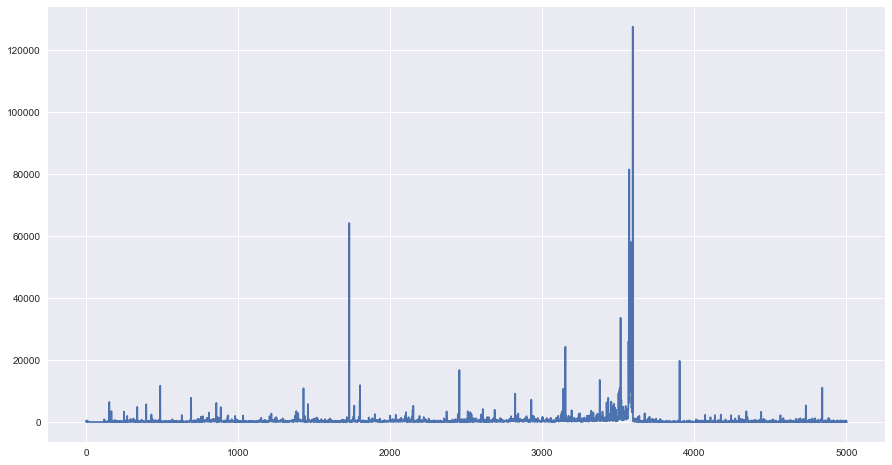

In [11]:
plt.plot([i for i in range(len(data.comment_num))],data.comment_num)
plt.show()

In [12]:
data[data.comment_num > 60000]

,id,weibo_content,weibo_place,publish_time,publish_tool,up_num,retweet_num,comment_num
1731,1731,从迟重瑞先生处惊悉我国第一代电视女导演、尊敬的杨洁导演去世的噩耗，异常悲痛，这是中国电视剧的...,无,2017-04-17 10:51,iPhone 6 Plus,563711,141847,64251
3572,3572,衷心希望大家继续支持关注 @央视春晚 并预祝成功直播，感谢媒体、网民对国粹猴戏艺术的支持，晚安！,无,2016-01-29 00:04,微博 weibo.com,512651,15031,81592
3595,3595,已化好妆准备录制。,无,2016-01-26 13:44,iPhone 5s,1314806,202708,127685


### 签到信息

In [13]:
data.weibo_place.value_counts()

无                      5001
http://t.cn/z8WGAKG       2
北京·潘家园旧货市场                1
Name: weibo_place, dtype: int64

### 微博内容

In [14]:
def extract_emoji(weibo):
    pattern = re.compile(r'[\[](.*?)[\]]', re.S)
    return re.findall(pattern, weibo)

def extract_at(weibo):
    pattern = re.compile(r'[@](.*?)[\s]', re.S)
    return re.findall(pattern, weibo)

In [15]:
emoji_list = []
for item in data.weibo_content:
    emoji_list.extend(extract_emoji(item))

In [16]:
at_list = []
for item in data.weibo_content:
    at_list.extend(extract_at(item))

In [17]:
from collections import Counter
def statistic_top(lst,top=100):

    result= dict(Counter(lst))
    sortlist=sorted(result.items(),key=lambda item:item[1],reverse=True)
    resultlist=[]
    for i in range(0,top):
        resultlist.append(sortlist[i])
    return sortlist,resultlist

#### 最爱使用的表情

In [18]:
emojis,top20_emoji = statistic_top(emoji_list,20)

In [19]:
print(top20_emoji)

[('祈祷', 2600), ('作揖', 1667), ('握手', 1411), ('good', 1047), ('耶', 1020), ('嘻嘻', 409), ('呲牙', 275), ('泪', 173), ('蜡烛', 128), ('心', 73), ('拳头', 59), ('ok', 48), ('蛋糕', 46), ('微笑', 39), ('赞', 33), ('偷笑', 32), ('鲜花', 30), ('猴子', 28), ('强壮', 27), ('爱你', 23)]


#### 最多@微博用户

In [20]:
ats,top20_at = statistic_top(at_list,20)

In [21]:
print(top20_at)

[('六小龄童', 520), ('儒意影业', 334), ('贰零壹陆影视传媒', 318), ('行走的禅文化', 270), ('一品行的微博', 265), ('光影先生1981', 168), ('六小龄童图书签名店', 110), ('酒至文亦来', 93), ('马德华', 85), ('人民网', 83), ('长江文艺出版社', 81), ('迟重瑞--人生只做一事又何妨', 55), ('沙和尚刘大刚', 46), ('六小龄童艺术馆', 42), ('中国新闻网', 39), ('北京杜莎夫人蜡像馆', 38), ('董董Dora', 36), ('北京长江新世纪', 35), ('汪粤_', 35), ('唐继全西游记博客', 35)]


#### 六老师曾经传道授业过的学校

In [22]:
university = dict()
for item in at_list:
    if '大学' in item or '学院' in item:
        if item in university:
            university[item] += 1
        else:
            university[item] = 1
sorted(university.items(), key=lambda d: d[1],reverse=True) 

[('云南师范大学', 23),
 ('浙江大学', 11),
 ('中国政法大学', 8),
 ('清华大学', 8),
 ('西北工业大学', 7),
 ('延安大学', 7),
 ('北京大学人民医院', 6),
 ('延安大学团委', 6),
 ('麻省理工学院中国学生学者联合会', 5),
 ('辽宁大学', 4),
 ('广东外语外贸大学', 4),
 ('陕西中医药大学', 4),
 ('内蒙古师范大学鸿德学院学生会', 4),
 ('上海视觉艺术学院', 4),
 ('哈佛大学中国学联', 4),
 ('成都农业科技职业学院', 4),
 ('电子科技大学', 3),
 ('同济大学', 3),
 ('北京大学', 3),
 ('陕西师范大学', 3),
 ('成都大学', 3),
 ('四川旅游学院', 2),
 ('甘肃林业职业技术学院', 2),
 ('歌德学院中国', 2),
 ('西北农林科技大学', 2),
 ('暨南大学', 2),
 ('太原工业学院微博协会', 2),
 ('太原工业学院团委', 2),
 ('太原科技大学微博校园', 2),
 ('太原科技大学学生会', 2),
 ('中北大学青年新媒体中心', 2),
 ('北京外国语大学', 2),
 ('上海师范大学', 2),
 ('西安建筑科技大学华清学院', 2),
 ('成都理工大学', 2),
 ('西安理工大学', 2),
 ('苏州大学', 2),
 ('武汉传媒学院', 1),
 ('中国传媒大学校团委', 1),
 ('中国政法大学研究生会', 1),
 ('西北师范大学微博协会', 1),
 ('吉林动画学院', 1),
 ('吉林大学', 1),
 ('苏州科技大学', 1),
 ('成都职业技术学院', 1),
 ('辽宁石油化工大学团委', 1),
 ('暨南大学暨南人网', 1),
 ('暨南大学学生会', 1),
 ('东北大学', 1),
 ('武汉理工大学', 1),
 ('杭州电子科技大学', 1),
 ('中国人民大学', 1),
 ('山西大学学生会', 1),
 ('西安汽车科技职业学院', 1),
 ('西安思源学院', 1),
 ('西安文理学院', 1),
 ('咸阳师范学院', 1),
 ('中北大学', 1),
 ('中北大

In [23]:
stopwords=[line.strip() for line in open('stopwords.txt', 'r', encoding='utf-8').readlines()]  

In [24]:
stopwords.extend([item[0] for item in emojis])

In [25]:
word_list = []
def seg_sentence(sentence):  
    sentence_seged = jieba.cut(sentence.strip())  
    outstr = ''  
    for word in sentence_seged:  
        if word not in stopwords:  
            if word != '\t' and word != '\n' and word != ' ':  
                outstr += word  
                outstr += " "  
                word_list.append(word)
    return outstr

In [26]:
for item in data.weibo_content:
    seg_sentence(item)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 2.326 seconds.
Prefix dict has been built succesfully.


In [27]:
top100 = statistic_top(word_list)

In [28]:
top100

([('六小龄童', 2978),
  ('内容', 929),
  ('文化', 928),
  ('西游记', 928),
  ('日', 804),
  ('…', 791),
  ('年', 753),
  ('月', 747),
  ('北京', 714),
  ('中', 590),
  ('孙悟空', 553),
  ('西游', 521),
  ('美猴王', 487),
  ('行者', 480),
  ('上海', 474),
  ('都', 454),
  ('cn', 443),
  ('http', 440),
  ('t', 434),
  ('老师', 420),
  ('支持', 397),
  ('影视', 392),
  ('时', 370),
  ('传媒', 358),
  ('参加', 355),
  ('大', 353),
  ('影业', 351),
  ('工作室', 343),
  ('儒意', 340),
  ('品行', 339),
  ('禅', 329),
  ('陆', 322),
  ('贰', 321),
  ('零壹', 321),
  ('电视剧', 321),
  ('艺术', 312),
  ('行走', 303),
  ('谢谢', 293),
  ('朋友', 292),
  ('关注', 289),
  ('大圣', 289),
  ('上', 286),
  ('光影', 283),
  ('1981', 283),
  ('呲', 276),
  ('牙', 276),
  ('读者', 273),
  ('感谢', 271),
  ('下午', 270),
  ('好', 265),
  ('报道', 264),
  ('后', 261),
  ('拍', 259),
  ('希望', 254),
  ('活动', 252),
  ('人', 247),
  ('玄奘', 246),
  ('世界', 236),
  ('签名', 235),
  ('央视版', 232),
  ('卫视', 232),
  ('观众', 227),
  ('导演', 224),
  ('猴王', 216),
  ('拍摄', 216),
  ('还', 213),
  ('国际', 212),
  

In [29]:
from PIL import Image
font_path = 'SourceHanSerifK-Light.otf'
bg_mask = np.array(Image.open("wk_b.jpg"))
wc = WordCloud(font_path=font_path,background_color="white", max_words=2000, mask=bg_mask,
               stopwords=stopwords, contour_width=3,width=1500, height=1500,contour_color='steelblue')

text = " ".join(word_list)
wc.generate(text)

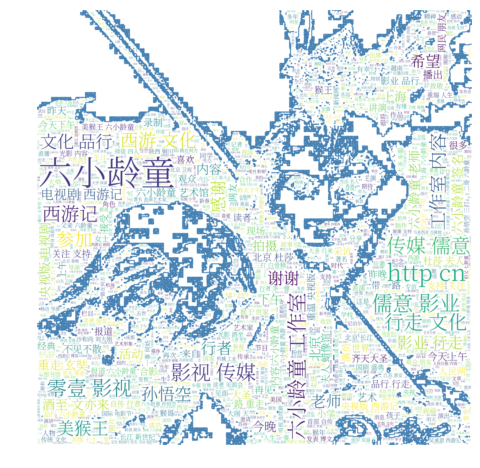

In [30]:
from wordcloud import WordCloud, ImageColorGenerator
image_colors_default = ImageColorGenerator(bg_mask)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [31]:
import jieba.analyse

#### top100 tfidf

In [32]:
keywords = jieba.analyse.extract_tags(" ".join(data.weibo_content.tolist()), topK=100, withWeight=True, allowPOS=('n','nr','ns'))

In [33]:
words_freq = {}
for item in keywords:
    words_freq[item[0]] = item[1]
    print(item[0],item[1])

六小龄童 0.6343470233175397
西游记 0.13945075097747403
用户 0.09440328348087988
先生 0.08875806053630114
理由 0.08582314433719176
美猴王 0.07602317600970149
孙悟空 0.0752224832743095
内容 0.07309064414033482
文化 0.07236837743654785
儒意 0.06228540486968647
电影 0.055501035469581045
大家 0.054569035844343534
影视 0.051295459723219215
北京 0.05106692280526647
品行 0.05060633728833522
工作室 0.050300206854480216
行者 0.04744258314328972
视频 0.0439538360298912
传媒 0.043348299215892915
中国 0.04212214875551319
光影 0.041675989973105065
电视剧 0.04104287165527414
老师 0.04101929461049986
卫视 0.03732690892625578
玄奘 0.03448134351917038
大圣 0.03351279580878605
上海 0.033293147989137885
谢谢 0.033102560332289525
读者 0.03105629262192482
猴戏 0.030491080683641848
六龄童 0.029677163496732967
艺术 0.02808771804284287
吴承恩 0.027956699170932298
朋友 0.026163162784475162
艺术馆 0.025664404512826013
观众 0.025585513716360905
路在何方 0.02491416194787459
图书 0.023997313395388156
杜莎 0.02308223827523675
人民网 0.022839455476743237
玄奘大师 0.0225326611734454
蜡像馆 0.0224368329558874
财迷 0.02

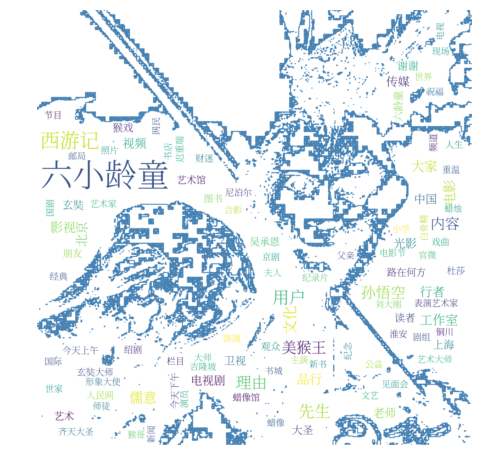

In [34]:
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

font_path = 'SourceHanSerifK-Light.otf'
bg_mask = np.array(Image.open("wk_b.jpg"))
wc = WordCloud(font_path=font_path,background_color="white", max_words=2000, mask=bg_mask,
               stopwords=stopwords, contour_width=3,width=1500, height=1500,contour_color='steelblue')
wc.generate_from_frequencies(words_freq)
image_colors_default = ImageColorGenerator(bg_mask)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

#### top100 textrank

In [35]:
keywords = jieba.analyse.textrank(" ".join(data.weibo_content.tolist()), topK=50, withWeight=True, allowPOS=('ns', 'n', 'vn', 'v'))

In [36]:
words_freq = {}
for item in keywords:
    words_freq[item[0]] = item[1]
    print(item[0],item[1])

六小龄童 1.0
转发 0.5720395987816792
祈祷 0.4447074180536226
中国 0.3482609217875586
先生 0.31583282099265136
文化 0.311089570365546
西游记 0.2880033839150823
内容 0.28585500858026736
大家 0.2772701492936572
作揖 0.27009428950554
理由 0.24480160802446302
北京 0.24027347933911092
用户 0.24022500224238455
原始 0.21053463540243766
电影 0.18409429995348228
上海 0.16239577312485978
老师 0.1519473083555033
参加 0.13808462231271953
艺术 0.1371392136331182
行者 0.12941983184273934
工作室 0.129154269368081
支持 0.12682016458013792
握手 0.11830836010377754
朋友 0.10828238354081404
希望 0.10575334618637543
活动 0.10567208152030902
视频 0.10387114216336386
读者 0.10251993356309269
感谢 0.10013370291615224
关注 0.09801062448941754
大圣 0.09056907233899865
世界 0.09045801828245996
电视剧 0.08913995386484869
观众 0.08667712155819923
拍摄 0.08591003573930743
国际 0.08506826798435838
报道 0.08489665396613907
小学 0.08215252313908958
经典 0.08119275108288021
签名 0.08072917334660352
光影 0.07322993025970072
艺术馆 0.0722235076363421
戏曲 0.06969772979584808
儒意 0.06925398221845118
卫视 0.06908543

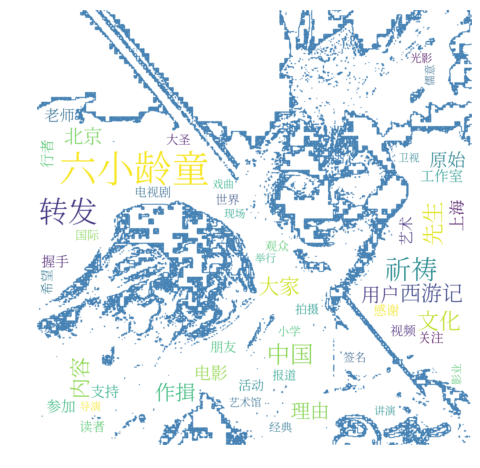

In [37]:
font_path = 'SourceHanSerifK-Light.otf'
bg_mask = np.array(Image.open("wk_b.jpg"))
wc = WordCloud(font_path=font_path,background_color="white", max_words=2000, mask=bg_mask,
               stopwords=stopwords, contour_width=3,width=1500, height=1500,contour_color='steelblue')
wc.generate_from_frequencies(words_freq)
image_colors_default = ImageColorGenerator(bg_mask)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

#### 词性分析

In [38]:
import jieba.posseg as pseg
words = pseg.cut(' '.join(data.weibo_content.tolist()))
nr = {}
ns = {}
t = {}
for word, flag in words:
    if flag == 'nr':
        try:
            nr[word] += 1
        except KeyError as e:
            nr[word] = 1
    elif flag == 'ns':
        try:
            ns[word] += 1
        except KeyError as e:
            ns[word] = 1
    elif flag == 't':
        try:
            t[word] += 1
        except KeyError as e:
            t[word] = 1

In [39]:
sorted_nr = sorted(nr.items(), key=lambda kv: kv[1],reverse=True)
sorted_ns = sorted(ns.items(), key=lambda kv: kv[1],reverse=True)
sorted_t = sorted(t.items(), key=lambda kv: kv[1],reverse=True)

前20出现人名：

In [40]:
sorted_nr[:20]

[('耶', 1022),
 ('孙悟空', 553),
 ('美猴王', 487),
 ('陆', 322),
 ('谢谢', 293),
 ('玄奘', 246),
 ('吴承恩', 163),
 ('今天下午', 161),
 ('今天上午', 146),
 ('杜莎', 126),
 ('玄奘大师', 123),
 ('齐天大圣', 116),
 ('尼泊尔', 100),
 ('祝福', 90),
 ('刘大刚', 89),
 ('孙', 87),
 ('弘扬', 72),
 ('师生', 72),
 ('迟重瑞', 72),
 ('白骨精', 71)]

前20出现地名：

In [41]:
sorted_ns[:20]

[('中国', 908),
 ('北京', 714),
 ('上海', 474),
 ('大圣', 289),
 ('淮安', 130),
 ('长江', 111),
 ('浙江', 108),
 ('越南', 93),
 ('沈阳', 89),
 ('陕西', 84),
 ('江苏', 79),
 ('美国', 77),
 ('香港', 77),
 ('英国', 77),
 ('天竺', 77),
 ('马来西亚', 76),
 ('宁波', 75),
 ('西安', 75),
 ('铜川', 74),
 ('安徽', 70)]

前二十出现时间：

In [42]:
sorted_t[:20]

[('今天', 732),
 ('下午', 270),
 ('今晚', 174),
 ('周年', 165),
 ('春晚', 153),
 ('去世', 150),
 ('上午', 146),
 ('现在', 113),
 ('昨天', 112),
 ('明天', 112),
 ('昨晚', 92),
 ('正在', 83),
 ('春节', 80),
 ('今日', 73),
 ('生日', 69),
 ('周恩来', 61),
 ('年前', 56),
 ('青年', 53),
 ('今年', 52),
 ('昨天下午', 50)]

### 微博时间

In [43]:
data['date'],data['time'] = zip(*data['publish_time'].map(lambda s:s.split()))

In [44]:
data['yy'],data['MM'],data['dd'] = zip(*data['date'].map(lambda s:s.split('-')))
data['hh'],data['mm']= zip(*data['time'].map(lambda s:s.split(':')))

#### 每月微博计数

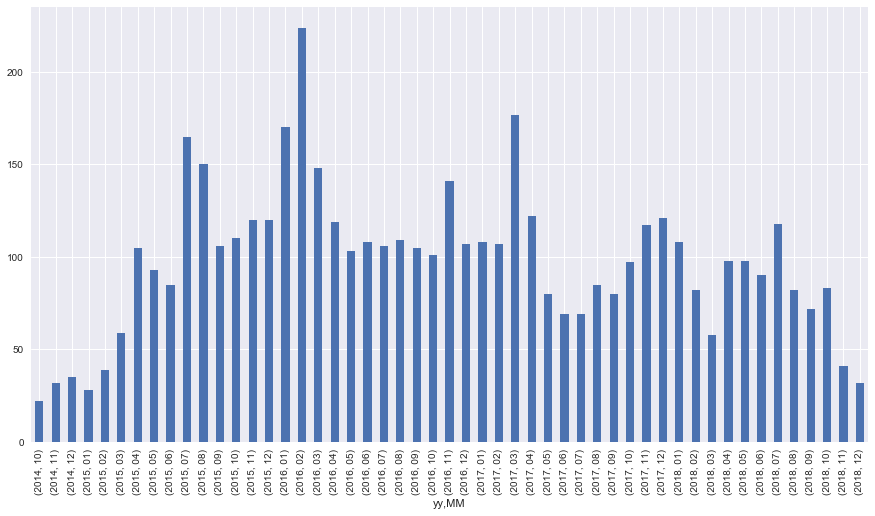

In [45]:
data.groupby(['yy','MM']).MM.count().plot.bar()
plt.show()

#### 每日微博计数

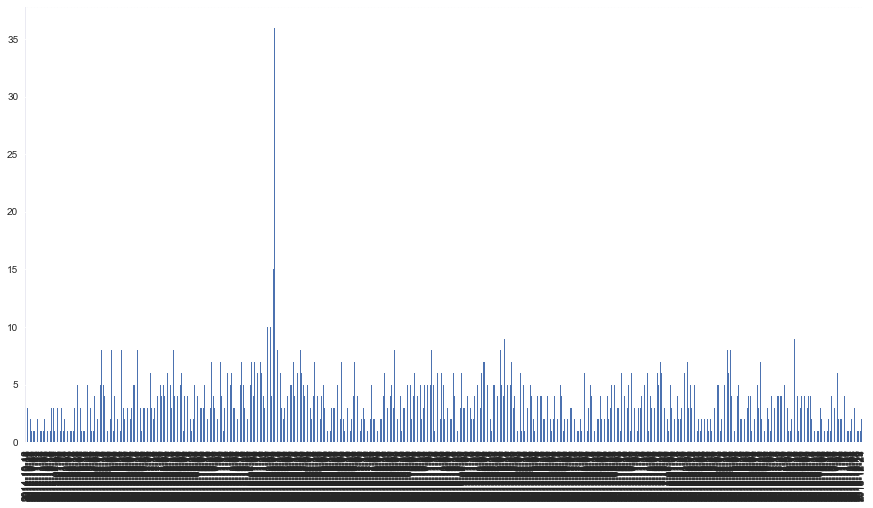

In [46]:
data.date.value_counts().sort_index().plot.bar()
plt.show()

In [47]:
tday = data.date.value_counts()[:5]
print(tday)
data[data.date==tday.index[0]]

2016-02-08    36
2016-02-11    15
2016-02-06    15
2015-07-24    14
2016-02-09    14
Name: date, dtype: int64


,id,weibo_content,weibo_place,publish_time,publish_tool,up_num,retweet_num,comment_num,date,time,yy,MM,dd,hh,mm
3472,3472,#北京台春晚#继续精彩。北京春晚火爆 大圣终于归来,无,2016-02-08 21:36,iPhone 5s,55378,890,5872,2016-02-08,21:36,2016,02,08,21,36
3473,3473,@北京杜莎夫人蜡像馆 北京杜莎夫人蜡像馆携手美猴王，祝你猴年快乐！,无,2016-02-08 21:11,微博 weibo.com,36066,352,1126,2016-02-08,21:11,2016,02,08,21,11
3474,3474,春节期间我的节目预告：六小龄童春节期间节目预告,无,2016-02-08 20:12,微博 weibo.com,26440,875,1570,2016-02-08,20:12,2016,02,08,20,12
3475,3475,静待北京卫视19：35，关注#北京台春晚#，整场晚会都有大圣陪伴你。[嘻嘻][嘻嘻],无,2016-02-08 19:09,iPhone 5s,44012,1447,4298,2016-02-08,19:09,2016,02,08,19,09
3476,3476,@北京卫视 春晚倒计时北京卫视春晚节目单公布 六小龄童贯穿全场,无,2016-02-08 18:23,iPhone 5s,52387,920,1853,2016-02-08,18:23,2016,02,08,18,23
3477,3477,丙申火猴年的第一天，晚餐属于二个人的世界，美中不足的是爱女妞妞远在大洋彼岸。愿大家猴年吉祥，...,无,2016-02-08 18:18,iPhone 5s,81925,429,3029,2016-02-08,18:18,2016,02,08,18,18
3478,3478,[嘻嘻][嘻嘻],无,2016-02-08 17:47,iPhone 5s,70509,1159,1953,2016-02-08,17:47,2016,02,08,17,47
3479,3479,时间快到了，今天没有办法回复所有朋友的问题，但是我都有看到，感谢大家的支持。祝大家猴年行大运...,无,2016-02-08 16:33,360安全浏览器,128978,1655,4677,2016-02-08,16:33,2016,02,08,16,33
3480,3480,转发微博已被删除,无,2016-02-08 16:25,360安全浏览器,30567,172,725,2016-02-08,16:25,2016,02,08,16,25
3481,3481,转发理由:我肯定会看的。我现在开始就已经在为看春晚做准备了。\n原始用户: 恍然如梦4562...,无,2016-02-08 16:16,360安全浏览器,22422,59,404,2016-02-08,16:16,2016,02,08,16,16


#### 年度微博计数

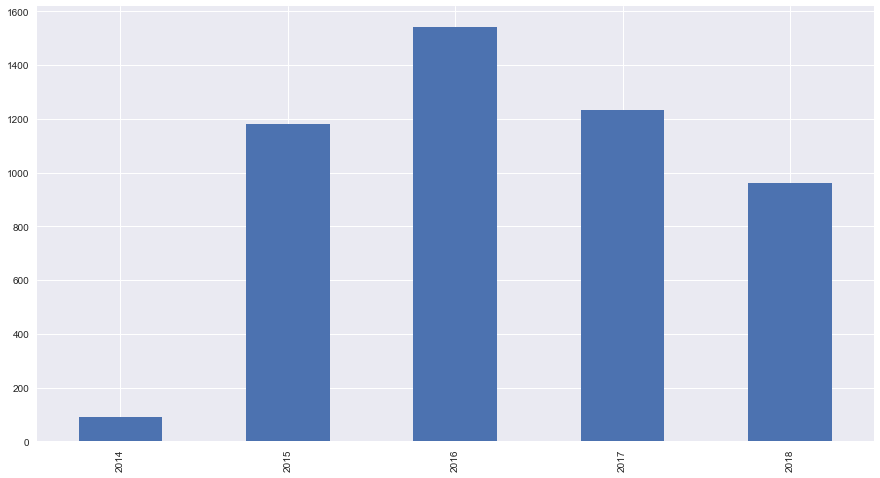

In [48]:
data.yy.value_counts().sort_index().plot.bar()
plt.show()

#### 月度微博计数

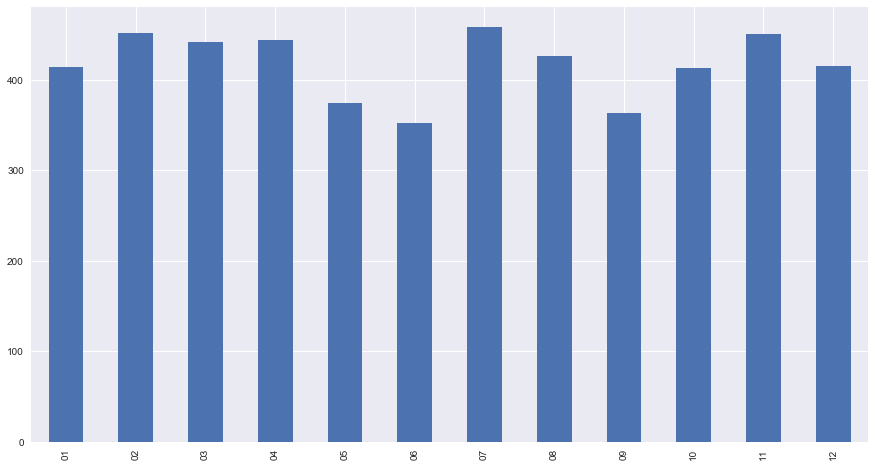

In [49]:
data.MM.value_counts().sort_index().plot.bar()
plt.show()

#### 日期微博统计

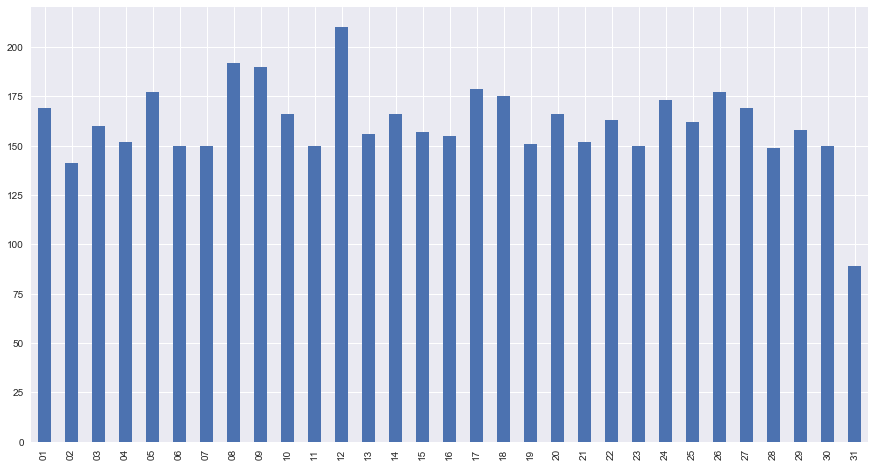

In [50]:
data.dd.value_counts().sort_index().plot.bar()
plt.show()

#### 偏爱发微博时间

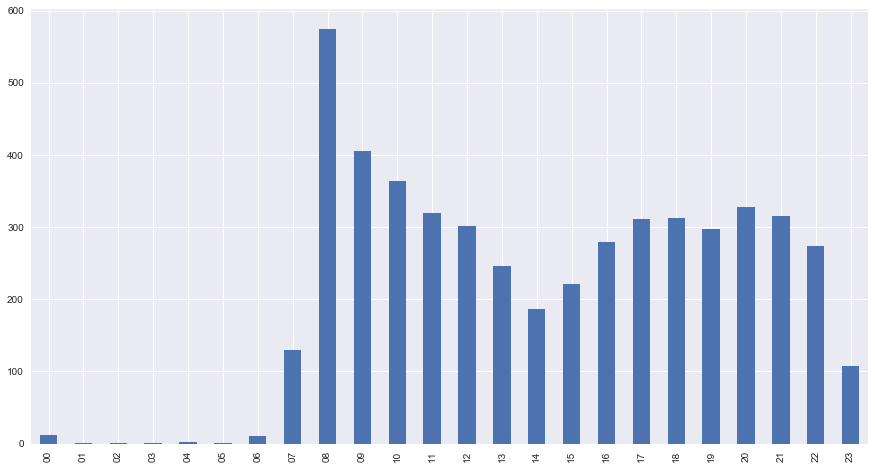

In [51]:
data.hh.value_counts().sort_index().plot.bar()
plt.show()

#### 分钟计数
整点效应。此处应该@何润东，大概8点20分发。

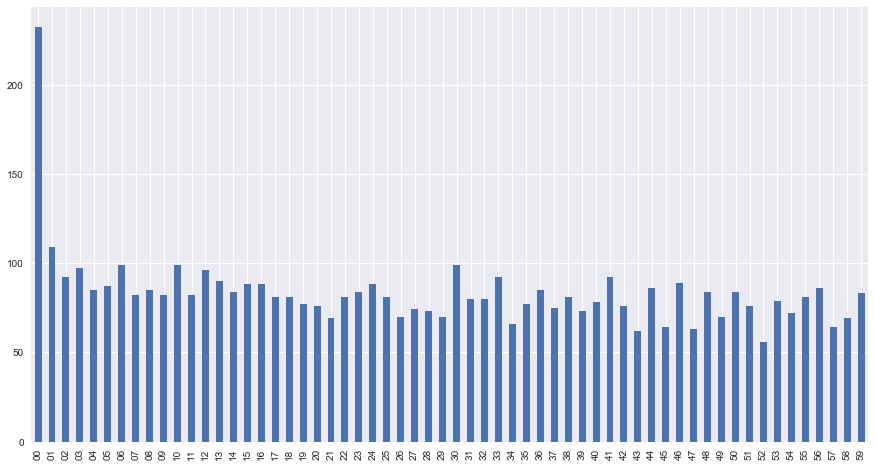

In [52]:
data.mm.value_counts().sort_index().plot.bar()
plt.show()